In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

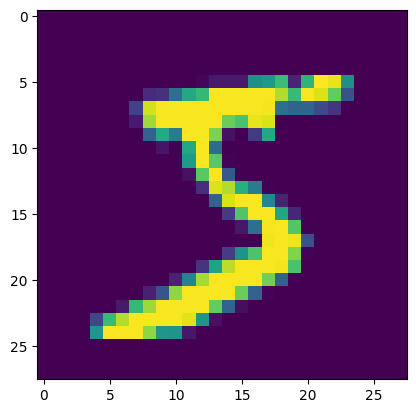

In [8]:
plt.imshow(single_image)

# PreProcessing Data

## Labels

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [17]:
y_cat_test = to_categorical(y_test,10)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
single_image.max()

np.uint8(255)

In [20]:
single_image.min()

np.uint8(0)

In [21]:
x_train = x_train/255
x_test = x_test/255

In [22]:
scaled_single = x_train[0]

In [23]:
scaled_single.max()

np.float64(1.0)

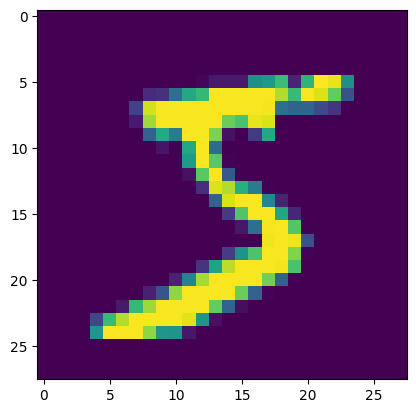

In [24]:
plt.imshow(scaled_single)

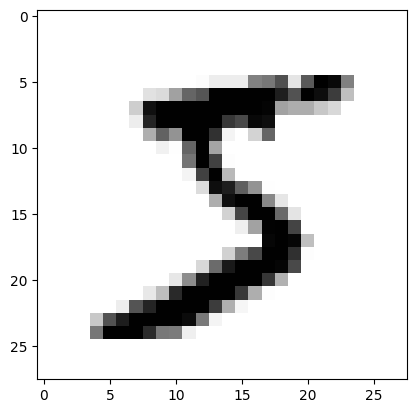

In [25]:
plt.imshow(scaled_single, cmap = plt.cm.gray_r, interpolation ="nearest")

## Reshaping the Data

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
x_test.shape

(10000, 28, 28)

In [28]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [29]:
x_train.shape

(60000, 28, 28, 1)

In [30]:
x_test = x_test.reshape(10000,28,28,1)

In [31]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,775,360 (6.77 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,183,574 (4.51 MB)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [34]:
#Write your code here

# Build your model, compile it and train it
# ...
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9165 - loss: 0.2793 - val_accuracy: 0.9805 - val_loss: 0.0569
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9855 - loss: 0.0455 - val_accuracy: 0.9861 - val_loss: 0.0433
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9908 - loss: 0.0285 - val_accuracy: 0.9860 - val_loss: 0.0423
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9940 - loss: 0.0183 - val_accuracy: 0.9876 - val_loss: 0.0348
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9962 - loss: 0.0116 - val_accuracy: 0.9870 - val_loss: 0.0429
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9888 - val_loss: 0.0431


## Evaluate the Model

In [35]:
model.metrics_names

['loss', 'compile_metrics']

In [36]:
losses = pd.DataFrame(model.history.history)

In [37]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.959150,0.136155,0.9805,0.056876
1,0.985333,0.047489,0.9861,0.043345
2,0.990350,0.029408,0.9860,0.042348
3,0.993400,0.020901,0.9876,0.034846
4,0.995317,0.014467,0.9870,0.042906


<Axes: >

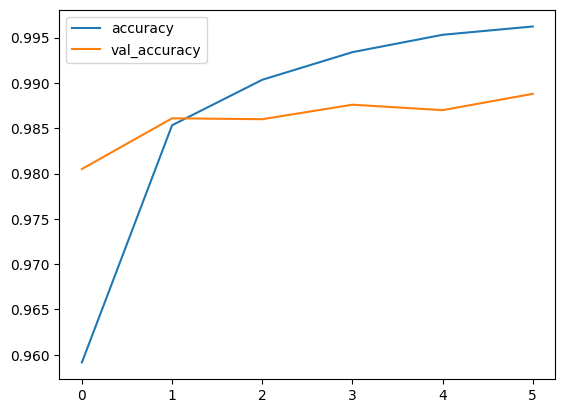

In [38]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

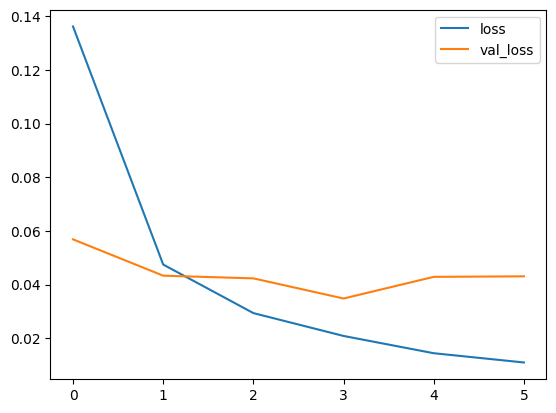

In [39]:
losses[['loss','val_loss']].plot()

In [40]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[0.04310748353600502, 0.9887999892234802]


In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
# predictions = model.predict_classes(x_test) # deprecated, used in older version of tensorflow
predictions=np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [43]:
y_cat_test.shape

(10000, 10)

In [44]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [45]:
predictions[0]

np.int64(7)

In [46]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [48]:
confusion_matrix(y_test,predictions)

array([[ 976,    1,    1,    1,    0,    0,    0,    0,    1,    0],
       [   1, 1132,    1,    0,    0,    0,    0,    1,    0,    0],
       [   2,    1, 1020,    3,    0,    0,    2,    3,    1,    0],
       [   1,    0,    1, 1003,    0,    3,    0,    0,    2,    0],
       [   0,    0,    1,    0,  973,    0,    1,    0,    0,    7],
       [   1,    0,    1,    8,    0,  874,    6,    0,    1,    1],
       [   4,    3,    0,    1,    1,    1,  948,    0,    0,    0],
       [   1,    1,    6,    1,    0,    0,    0, 1017,    2,    0],
       [   4,    1,    3,    3,    0,    0,    2,    1,  959,    1],
       [   1,    1,    0,    5,    4,    1,    0,    6,    5,  986]])

In [49]:
import seaborn as sns

<Axes: >

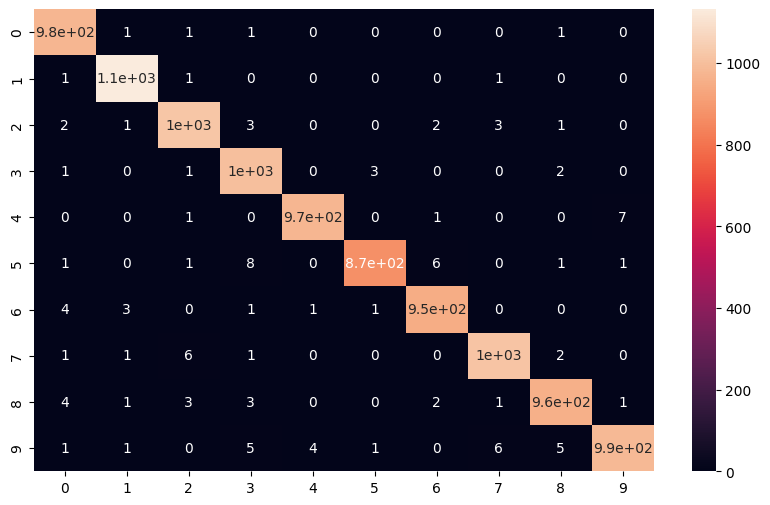

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a given image

In [70]:
my_number = x_test[9998]

In [71]:
len(x_test)

10000

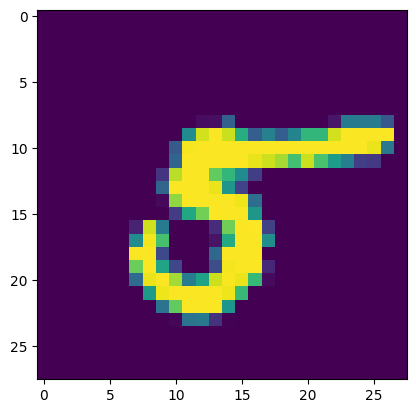

In [72]:
plt.imshow(my_number.reshape(28,28))

In [73]:
#predict=model.predict_classes(my_number.reshape(1,28,28,1)) # deprecated, used in older version of tensorflow
predict=np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([5])

In [69]:
model.save('my_model.h5')